In [1]:
import pandas as pd
import glob

# Get a list of all CSV files in the current directory that match the pattern
file_list = glob.glob('data/測試資料/銷售資料_*.xlsx')
print(len(file_list))

# Initialize variables
total_transactions = 0
all_psids = set()
all_userids = set()

# Loop through each file
for file in file_list:
    # Read the CSV file into a DataFrame
    df = pd.read_excel(file)
    
    # Add the number of rows to the total transaction count
    total_transactions += len(df)
    
    # Check if 'ASID' column exists before processing
    if 'ASID' in df.columns:
        # Add the unique PSIDs from the 'PSID' column to the set of unique PSIDs
        all_psids.update(df['ASID'].unique())
    
    # Check if 'userID' column exists before processing
    if 'USER_ID' in df.columns:
        # Add the unique userIDs from the 'userID' column to the set of unique userIDs
        all_userids.update(df['USER_ID'].unique())

# Get the total number of unique PSIDs and userIDs
total_unique_psids = len(all_psids)
total_unique_userids = len(all_userids)

# Print the results
print(f"總共有 {total_transactions} 筆交易資料")
print(f"總共有 {total_unique_psids} 個 PSID")
print(f"總共有 {total_unique_userids} 個 userID")

1882


BadZipFile: File is not a zip file

# 資料前處理

## 資料載入

In [2]:
import pandas as pd
import glob
import os

In [2]:
# 建立儲存新格式檔案的資料夾
output_dir_feather = 'data/測試資料_feather'
os.makedirs(output_dir_feather, exist_ok=True)

# 找到所有要轉換的 Excel 檔案
file_list = glob.glob('data/測試資料/銷售資料_*.xlsx')

print(f"找到 {len(file_list)} 個 Excel 檔案，開始轉換為 Feather 格式...")

# 迴圈讀取 Excel 並另存為 Feather
for file in file_list:
    try:
        # 讀取 Excel 檔案
        df = pd.read_excel(file)
        
        # 產生新檔名
        base_name = os.path.basename(file)
        file_name_without_ext = os.path.splitext(base_name)[0]
        output_path = os.path.join(output_dir_feather, f"{file_name_without_ext}.feather")
        
        # 使用 reset_index 儲存為 Feather 格式
        df.reset_index(drop=True).to_feather(output_path)
        print(f"已成功轉換: {output_path}")
        
    except Exception as e:
        print(f"處理檔案 {file} 時發生錯誤: {e}")

print("\n所有檔案轉換完成！")

找到 1561 個 Excel 檔案，開始轉換為 Feather 格式...
已成功轉換: data/測試資料_feather\銷售資料_202101_202212_10192.feather


KeyboardInterrupt: 

In [3]:
# 1. 設定 Feather 檔案的路徑
data_dir = 'data/測試資料_feather/'
pattern = os.path.join(data_dir, '銷售資料_*.feather')
file_list = glob.glob(pattern)

print(f"找到 {len(file_list)} 個 Feather 檔案，開始讀取...")

# 2. 讀取並合併所有 Feather 檔
# 讀取 Feather 檔案比 Excel 快非常多
dfs = [pd.read_feather(fp) for fp in file_list[:5]]
data = pd.concat(dfs, ignore_index=True)

print("資料合併完成！")

# import os
# import glob
# import pandas as pd

# # 1. 設定資料路徑
# data_dir = 'data/測試資料/'  # 改成你的資料夾路徑
# pattern = os.path.join(data_dir, '銷售資料_*.xlsx')
# file_list = glob.glob(pattern)

# # 2. 讀取並合併所有 Excel 檔
# dfs = []
# for fp in file_list:
#     df = pd.read_excel(fp)
#     dfs.append(df)
# data = pd.concat(dfs, ignore_index=True)

找到 1560 個 Feather 檔案，開始讀取...
資料合併完成！


In [4]:
data.head().keys()

Index(['訂單編號', '下單日期', '時間戳記', 'PSID', 'ASID', 'USER_ID', 'CHANNEL_NAME',
       '商品ID', '商品名稱', '樣式', '規格', '單價', '數量', '折扣', '總金額', '付款單號', '專屬折扣',
       '運費', '收款金額', '付款方式', '運送方式', '寄送地址', '場次'],
      dtype='object')

## 資料 EDA

In [ ]:
import matplotlib.pyplot as plt

轉換失敗的筆數： 0
  order_date order_time  timestamp
0   20210329   16:58:11 2021-03-29
1   20210329   17:22:47 2021-03-29
2   20210329   17:33:11 2021-03-29
3   20210331   16:03:04 2021-03-31
4   20210331   16:03:04 2021-03-31
各欄位缺失值比例：
訂單編號                0.000000
order_date          0.000000
order_time          0.000000
PSID                0.192466
user_id             0.000000
streamer_id         0.000000
CHANNEL_NAME        0.000000
item_id             0.000885
item_name           0.000000
樣式                  0.591214
規格                  0.738389
unit_price          0.000000
quantity            0.000000
折扣                  0.000000
total_amount        0.000000
付款單號                0.000000
專屬折扣                0.000000
運費                  0.000000
收款金額                0.000000
payment_method      0.000000
運送方式                0.000000
shipping_address    0.000353
場次                  0.012169
timestamp           0.000000
dtype: float64
總交易筆數：1057512
獨立用戶數：32090
獨立直播主數：5

每月交易量：
timestamp
2021-

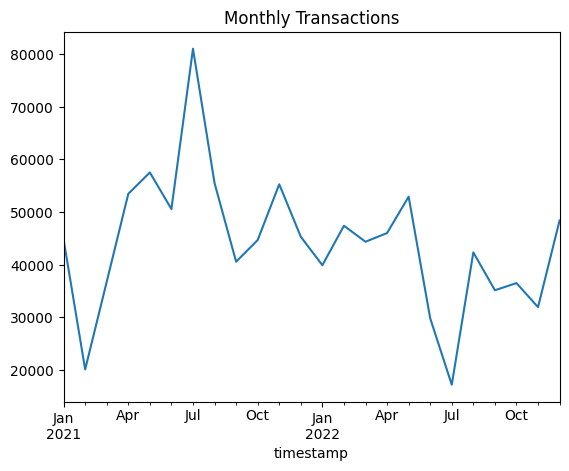

In [ ]:
# 3. 統一欄位名稱
data = data.rename(columns={
    'ASID': 'user_id',
    'USER_ID': 'streamer_id',
    '商品ID': 'item_id',
    '商品名稱': 'item_name',
    '單價': 'unit_price',
    '數量': 'quantity',
    '總金額': 'total_amount',
    '付款方式': 'payment_method',
    '寄送地址': 'shipping_address',
    '下單日期': 'order_date',
    'POST_ID': 'post_id',
    '留言': 'comment',
    '時間戳記': 'order_time',
})

# 4. 轉換時間欄位型別
# 假設原始時間欄位叫 'timestamp'，格式如 '2022-01-15 14:23:00'
data['order_date'] = data['order_date'].astype(str).str.zfill(8)
data['timestamp'] = pd.to_datetime(
    data['order_date'],
    format='%Y%m%d',
    errors='coerce'
)
print("轉換失敗的筆數：", data['timestamp'].isna().sum())
print(data[['order_date', 'order_time', 'timestamp']].head())

# 5. 處理重複與缺失值
# 刪除完全重複的整列
data = data.drop_duplicates()
# 檢視缺失值比例
print("各欄位缺失值比例：")
print(data.isna().mean())

# 6. 基本統計
total_transactions = len(data)
unique_users       = data['user_id'].nunique()
unique_streamers   = data['streamer_id'].nunique()
# 如果有 item_id 欄位
# unique_items       = data['item_id'].nunique()

print(f"總交易筆數：{total_transactions}")
print(f"獨立用戶數：{unique_users}")
print(f"獨立直播主數：{unique_streamers}")
# print(f"獨立商品數：{unique_items}")

# 7. 時序分佈（可視化）
#  7.1 每月交易量
monthly = data.set_index('timestamp').resample('ME').size()
print("\n每月交易量：")
print(monthly)

#  7.2 每日交易量
daily = data.set_index('timestamp').resample('D').size()
print("\n每日交易量前五：")
print(daily.head())

# 若要畫圖，可再加：
monthly.plot(title='Monthly Transactions')
plt.show()


In [ ]:
data.keys()

Index(['訂單編號', 'order_date', 'order_time', 'PSID', 'user_id', 'streamer_id',
       'CHANNEL_NAME', 'item_id', 'item_name', '樣式', '規格', 'unit_price',
       'quantity', '折扣', 'total_amount', '付款單號', '專屬折扣', '運費', '收款金額',
       'payment_method', '運送方式', 'shipping_address', '場次', 'timestamp'],
      dtype='object')

In [ ]:
data.head()

,訂單編號,order_date,order_time,PSID,user_id,streamer_id,CHANNEL_NAME,item_id,item_name,樣式,...,付款單號,專屬折扣,運費,收款金額,payment_method,運送方式,shipping_address,場次,COMMENT_ID,timestamp
0,BD210101-24659032,20210101,00:07:58,3123281874383707,3569894936461536,15217,小資女精品服飾( 劉冰冰小資女精品服飾有限公司,NaN,發財金$$$$$,None,...,PA210108-04994814,0,120,6687,匯款,7-11C2C,7-ELEVEN 大德門市（地址：高雄市三民區寶玉里大豐二路348號 / 電話：--）,NaN,NaN,2021-01-01
1,BD210101-24659033,20210101,00:07:58,2056845641067102,10213250868933593,15217,小資女精品服飾( 劉冰冰小資女精品服飾有限公司,NaN,發財金$$$$$,None,...,PA210114-05129506,0,60,3578,匯款,7-11C2C,7-ELEVEN 長青門市（地址：高雄市鳥松區鳥松里大智路5號 / 電話：--）,NaN,NaN,2021-01-01
2,BD210101-24659034,20210101,00:07:58,2549311421797719,1158290481020558,15217,小資女精品服飾( 劉冰冰小資女精品服飾有限公司,NaN,發財金$$$$$,None,...,PA210112-05085419,0,0,6031,匯款,一般宅配,新北市板橋區樂群路180號7樓之6,NaN,NaN,2021-01-01
3,BD210101-24659035,20210101,00:07:59,3648955408479224,2920326754670177,15217,小資女精品服飾( 劉冰冰小資女精品服飾有限公司,NaN,發財金$$$$$,None,...,PA210111-05061126,0,60,2484,匯款,一般宅配,台東縣綠島鄉南寮村漁港35號,NaN,NaN,2021-01-01
4,BD210101-24659036,20210101,00:08:00,2663100147041730,10158151406577582,15217,小資女精品服飾( 劉冰冰小資女精品服飾有限公司,NaN,發財金$$$$$,None,...,PA210111-05066109,0,60,987,匯款,全家C2C,全家 全家五股高亞店（地址：新北市五股區興珍里中興路一段142號142之1號一 / 電話：0...,NaN,NaN,2021-01-01


### 移除資料中單價為 0 的交易

In [ ]:
print("移除前筆數：", len(data))
data = data[data['unit_price'] != 0].reset_index(drop=True)
print("移除後筆數：", len(data))

移除前筆數： 1039212
移除後筆數： 1039212


In [20]:
data.to_csv('data/processed_sales_data.csv', index=False, encoding='utf-8-sig')

# 建構 TGN 訓練資料

In [3]:
data = pd.read_csv('data/processed_sales_data.csv', encoding='utf-8-sig')

C:\Users\Mattis\AppData\Local\Temp\ipykernel_15892\1012901909.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/processed_sales_data.csv', encoding='utf-8-sig')


In [4]:
essential_cols = ['timestamp', 'user_id', 'streamer_id', 'item_id']
# 計算轉換前的行數
original_rows = len(data)

# 刪除任何在關鍵 ID 或時間戳上為空的行
data_clean = data.dropna(subset=essential_cols)

print(f"原始資料筆數: {original_rows}")
print(f"清理掉關鍵欄位缺失值後的筆數: {len(data_clean)}")
print("-" * 30)

原始資料筆數: 1039212
清理掉關鍵欄位缺失值後的筆數: 1038855
------------------------------


In [ ]:
id_counts = data_clean['user_id'].value_counts()
unique_users_with_duplicates = (id_counts > 1).sum()

print(f"總共有 {unique_users_with_duplicates} 個 user_id 的值是重複的。")

總共有 29301 個 user_id 的值是重複的。


In [ ]:
# 1. 計算每個 user_id 的總出現次數
id_counts = data_clean['user_id'].value_counts()

# 2. 篩選出出現次數 > 1 的 user_id
duplicate_id_counts = id_counts[id_counts > 1]

print("每個重複的 user_id 的總出現次數：")
print(duplicate_id_counts)

每個重複的 user_id 的總出現次數：
user_id
3230378580311940    2362
2678527052427857    2203
2674986499451034    2132
2682587951796147    1895
100149508669531     1852
                    ... 
2563497053926394       2
306473334389077        2
848545565913268        2
2639204962878219       2
4487933307899193       2
Name: count, Length: 29301, dtype: int64


: 

In [5]:
data_clean.head(50).to_csv('data/cleaned_sales_data.csv', index=False, encoding='utf-8-sig')

In [ ]:
data

,訂單編號,order_date,order_time,PSID,user_id,streamer_id,CHANNEL_NAME,item_id,item_name,樣式,...,total_amount,付款單號,專屬折扣,運費,收款金額,payment_method,運送方式,shipping_address,場次,timestamp
0,BD210329-34136318,20210329,16:58:11,3187242071328795,446275215947661,10192,蘭蘭直播,2898840.0,第 005 標 (3/29)LAN 身體乳 3罐 999,NaN,...,999,PA210329-06498920,0,0,999,自取,一般宅配,自取,20210329.0,2021-03-29
1,BD210329-34137283,20210329,17:22:47,3187242071328795,446275215947661,10192,蘭蘭直播,2898928.0,第 006 標 (3/29) 水晶凍1+玻尿酸1+珍珠霜 1(一組) 2000,NaN,...,2000,PA210329-06499301,0,0,2000,自取,一般宅配,自取,20210329.0,2021-03-29
2,BD210329-34137600,20210329,17:33:11,3187242071328795,446275215947661,10192,蘭蘭直播,2898961.0,第 006-1 標 (3/29)拍賣公告：水晶凍1+玻尿酸1+珍珠霜 1(一組)1888元,NaN,...,1888,PA210329-06499481,0,0,1888,自取,一般宅配,自取,20210329.0,2021-03-29
3,BD210331-34317693,20210331,16:03:04,3970855859619192,3460496127388255,10192,蘭蘭直播,2915197.0,第 001 標 (3/31) 大禹嶺 私版茶 1包399元,NaN,...,6384,PA210331-06535923,0,0,6384,自取,一般宅配,自取,20210331.0,2021-03-31
4,BD210331-34317696,20210331,16:03:04,2901432939984384,4487933307899193,10192,蘭蘭直播,2915197.0,第 001 標 (3/31) 大禹嶺 私版茶 1包399元,NaN,...,1596,PA210331-06536843,0,0,1796,自取,一般宅配,自取,20210331.0,2021-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039207,BD221231-138617703,20221231,23:57:17,4085490411467881,3058916404131778,10736,Bo Bo日韓系包包專賣(黛薇妮商行),10727733.0,第 761 標 (12/31)分享禮~時尚擴香瓶(隨機),NaN,...,16,PA230102-26033392,0,80,1413,智慧轉帳,一般宅配,宜蘭縣冬山鄉義成路2段342巷11號,20221231.0,2022-12-31
1039208,BD221231-138617704,20221231,23:57:17,5260049160776896,3315095721851708,10736,Bo Bo日韓系包包專賣(黛薇妮商行),10727733.0,第 761 標 (12/31)分享禮~時尚擴香瓶(隨機),NaN,...,16,PA230105-26162578,101,80,2954,智慧轉帳,一般宅配,台南市東區東門路三段226巷28號,20221231.0,2022-12-31
1039209,BD221231-138617809,20221231,23:58:13,NaN,5283981988297312,10736,Bo Bo日韓系包包專賣(黛薇妮商行),10627266.0,第 504 標 (12/24)超好吃~果乾三寶,草莓,...,89,PA230102-26031583,1798,80,5013,智慧轉帳,一般宅配,花蓮縣花蓮市民權路2-2號（黎明教養院）,20221224.0,2022-12-31
1039210,BD221231-138617816,20221231,23:58:26,NaN,2856010801147811,10736,Bo Bo日韓系包包專賣(黛薇妮商行),10727652.0,第 756 標 (12/31)正版卡納赫拉~行動電源(隨機圖案),NaN,...,188,PA230102-26057868,0,80,767,智慧轉帳,一般宅配,雲林縣斗六市中正路212號（萊爾富莊敬門市）,20221231.0,2022-12-31


: 

In [7]:
# --- 步驟 2: 定義將用於互動特徵的欄位 ---
# 這些特徵描述了每一次互動的屬性
feature_cols = ['quantity', 'unit_price', 'total_amount', '折扣', '運費']


# 事件 1: 消費者 '購買' 商品 (user -> item)
user_item_events = data_clean[['timestamp', 'user_id', 'item_id'] + feature_cols].copy()
user_item_events.rename(columns={'user_id': 'source', 'item_id': 'destination'}, inplace=True)
user_item_events['event_type'] = 'buy'

# 事件 2: 直播主 '售出' 商品 (streamer -> item)
streamer_item_events = data_clean[['timestamp', 'streamer_id', 'item_id'] + feature_cols].copy()
streamer_item_events.rename(columns={'streamer_id': 'source', 'item_id': 'destination'}, inplace=True)
streamer_item_events['event_type'] = 'sell'

# 事件 3: 消費者 '觀看並購買' 直播主 (user -> streamer)
user_streamer_events = data_clean[['timestamp', 'user_id', 'streamer_id'] + feature_cols].copy()
user_streamer_events.rename(columns={'user_id': 'source', 'streamer_id': 'destination'}, inplace=True)
user_streamer_events['event_type'] = 'watch_and_buy'

print("已創建三種互動事件的 DataFrame。")
print(f"消費者-商品 事件數: {len(user_item_events)}")
print(f"直播主-商品 事件數: {len(streamer_item_events)}")
print(f"消費者-直播主 事件數: {len(user_streamer_events)}")
print("-" * 30)


# --- 步驟 4: 合併所有事件並按時間排序 (TGN 的核心要求) ---
all_events = pd.concat([user_item_events, streamer_item_events, user_streamer_events], ignore_index=True)

# *** 這是最關鍵的一步：必須嚴格按照時間戳排序 ***
tgn_data = all_events.sort_values(by='timestamp').reset_index(drop=True)

print(f"已合併所有事件，總事件數: {len(tgn_data)}")
print("已按照時間戳完成排序。")
print("-" * 30)


# --- 步驟 5: 產生最終的 edge_features 欄位 ---
# TGN 模型通常接受一個向量 (vector) 作為邊的特徵。
# 我們將之前選定的 feature_cols 合併成一個 list 或 numpy array。
tgn_data['edge_features'] = tgn_data[feature_cols].values.tolist()

# 創建最終的 DataFrame，只保留 TGN 需要的欄位
tgn_data_final = tgn_data[['timestamp', 'source', 'destination', 'event_type', 'edge_features']]

print("已生成最終 TGN 事件流 DataFrame。")

# --- 最終結果預覽 ---
print("\n最終 TGN 資料格式預覽 (前 10 筆):")
print(tgn_data_final.head(10))

print("\n最終資料的資訊:")
tgn_data_final.info()

已創建三種互動事件的 DataFrame。
消費者-商品 事件數: 1038855
直播主-商品 事件數: 1038855
消費者-直播主 事件數: 1038855
------------------------------
已合併所有事件，總事件數: 3116565
已按照時間戳完成排序。
------------------------------
已生成最終 TGN 事件流 DataFrame。

最終 TGN 資料格式預覽 (前 10 筆):
    timestamp source  destination event_type          edge_features
0  2021-01-01  10736    2185886.0       sell  [6, 198, 1188, 0, 80]
1  2021-01-01  10736    2185293.0       sell   [1, 188, 188, 0, 80]
2  2021-01-01  10736    2185293.0       sell  [1, 188, 188, 0, 130]
3  2021-01-01  10736    2185293.0       sell   [1, 188, 188, 0, 80]
4  2021-01-01  10736    2185293.0       sell   [2, 188, 376, 0, 80]
5  2021-01-01  10736    2185293.0       sell   [2, 188, 376, 0, 80]
6  2021-01-01  10736    2185293.0       sell   [2, 188, 376, 0, 80]
7  2021-01-01  10736    2185293.0       sell   [1, 188, 188, 0, 80]
8  2021-01-01  10736    2185293.0       sell   [1, 188, 188, 0, 80]
9  2021-01-01  10736    2185293.0       sell   [2, 188, 376, 0, 80]

最終資料的資訊:
<class 'panda

In [8]:
event_counts = tgn_data_final['event_type'].value_counts()

# 輸出結果
print("\n--- 各事件類型 (event_type) 的數量分佈 ---")
print(event_counts)


--- 各事件類型 (event_type) 的數量分佈 ---
event_type
sell             1038855
watch_and_buy    1038855
buy              1038855
Name: count, dtype: int64


In [9]:
tgn_data_final.to_csv('tgn_data_final.csv', index=False, encoding='utf-8-sig')

In [11]:
tgn_data_final.head(10)

,timestamp,source,destination,event_type,edge_features
0,2021-01-01,10736,2185886.0,sell,"[6, 198, 1188, 0, 80]"
1,2021-01-01,10736,2185293.0,sell,"[1, 188, 188, 0, 80]"
2,2021-01-01,10736,2185293.0,sell,"[1, 188, 188, 0, 130]"
3,2021-01-01,10736,2185293.0,sell,"[1, 188, 188, 0, 80]"
4,2021-01-01,10736,2185293.0,sell,"[2, 188, 376, 0, 80]"
5,2021-01-01,10736,2185293.0,sell,"[2, 188, 376, 0, 80]"
6,2021-01-01,10736,2185293.0,sell,"[2, 188, 376, 0, 80]"
7,2021-01-01,10736,2185293.0,sell,"[1, 188, 188, 0, 80]"
8,2021-01-01,10736,2185293.0,sell,"[1, 188, 188, 0, 80]"
9,2021-01-01,10736,2185293.0,sell,"[2, 188, 376, 0, 80]"


# 準備 Embedding

In [ ]:
import json
import numpy as np

In [ ]:
unique_users = data_clean['user_id'].unique()
unique_streamers = data_clean['streamer_id'].unique()
unique_items = data_clean['item_id'].unique()

# 計算偏移量，以確保三種類型的節點索引不會重疊
user_offset = 0
streamer_offset = len(unique_users)
item_offset = streamer_offset + len(unique_streamers)
n_total_nodes = item_offset + len(unique_items)

print(f"總用戶數: {len(unique_users)}")
print(f"總直播主數: {len(unique_streamers)}")
print(f"總商品數: {len(unique_items)}")
print(f"總節點數 (Total Nodes): {n_total_nodes}")

# 創建從原始 ID 到新索引 (0, 1, 2...) 的映射字典
user_id_to_idx = {uid: i + user_offset for i, uid in enumerate(unique_users)}
streamer_id_to_idx = {sid: i + streamer_offset for i, sid in enumerate(unique_streamers)}
item_id_to_idx = {iid: i + item_offset for i, iid in enumerate(unique_items)}

# 合併成一個總的映射字典，方便後續使用
# 注意：這裡假設 user_id, streamer_id, item_id 不會有任何衝突，這是合理的
node_id_to_idx = {**user_id_to_idx, **streamer_id_to_idx, **item_id_to_idx}
print("\n已創建所有節點的統一 ID 映射。")
print("-" * 30)


# --- 步驟 2: 計算 User 和 Streamer 的嵌入 ---

print("正在計算 User 和 Streamer 的嵌入...")
# User Embedding: 該用戶買過的所有商品 ID 的平均值
user_embeddings = data_clean.groupby('user_id')['item_id'].mean()

# Streamer Embedding: 該直播主賣過的所有商品 ID 的平均值
streamer_embeddings = data_clean.groupby('streamer_id')['item_id'].mean()

print("User Embedding (前 5 筆):")
print(user_embeddings.head())
print("\nStreamer Embedding (前 5 筆):")
print(streamer_embeddings.head())
print("-" * 30)


# --- 步驟 3 & 4: 創建並填充最終的節點特徵矩陣 ---

print("正在創建最終的節點特徵矩陣...")
# 因為每個嵌入都是一個單一的數值，所以我們的特徵維度是 1
feature_dim = 1
node_features = np.zeros((n_total_nodes, feature_dim))

# 填充 User 嵌入
for user_id, avg_item_id in user_embeddings.items():
    idx = user_id_to_idx[user_id]
    node_features[idx, 0] = avg_item_id

# 填充 Streamer 嵌入
for streamer_id, avg_item_id in streamer_embeddings.items():
    idx = streamer_id_to_idx[streamer_id]
    node_features[idx, 0] = avg_item_id

# 填充 Item 嵌入 (使用它自己的 ID)
for item_id, idx in item_id_to_idx.items():
    node_features[idx, 0] = item_id

print(f"節點特徵矩陣創建完成！形狀為: {node_features.shape}")
print("矩陣預覽 (前 5 行):")
print(node_features[:5])
print("-" * 30)


# --- 步驟 5: 儲存結果 ---

# 儲存節點特徵矩陣
np.save('node_features.npy', node_features)

# 儲存 ID 映射字典，這在訓練時至關重要！
with open('node_id_to_idx.json', 'w') as f:
    # json 無法直接處理 numpy int64，需要轉換
    node_id_to_idx_serializable = {str(k): int(v) for k, v in node_id_to_idx.items()}
    json.dump(node_id_to_idx_serializable, f)

print("成功儲存以下檔案:")
print("1. node_features.npy  (節點特徵矩陣)")
print("2. node_id_to_idx.json (ID 映射字典)")

總用戶數: 32059
總直播主數: 5
總商品數: 19593
總節點數 (Total Nodes): 51657

已創建所有節點的統一 ID 映射。
------------------------------
正在計算 User 和 Streamer 的嵌入...
User Embedding (前 5 筆):
user_id
102460445020543    3384595.0
108860454720540    3742301.0
165835361813956    3435441.0
196605595697727    3708343.0
207885930115243    3384472.0
Name: item_id, dtype: float64

Streamer Embedding (前 5 筆):
streamer_id
10192    3.783149e+06
10195    4.966930e+06
10521    2.352181e+06
10678    4.962057e+06
10736    5.944687e+06
Name: item_id, dtype: float64
------------------------------
正在創建最終的節點特徵矩陣...
節點特徵矩陣創建完成！形狀為: (51657, 1)
矩陣預覽 (前 5 行):
[[2898909.66666667]
 [2915197.        ]
 [2915380.        ]
 [3384472.        ]
 [3384595.        ]]
------------------------------
成功儲存以下檔案:
1. node_features.npy  (節點特徵矩陣)
2. node_id_to_idx.json (ID 映射字典)


# 訓練 TGN

In [7]:
import torch

# 檢查 PyTorch 版本
pytorch_version = torch.__version__
print(f"PyTorch Version: {pytorch_version}")

cuda_version = torch.version.cuda
print(f"CUDA Version (linked with PyTorch): {cuda_version}")

PyTorch Version: 2.8.0+cu128
CUDA Version (linked with PyTorch): 12.8


## 將 CHANNEL 以及 item_name 結合傳給 LLM 進行判斷

In [ ]:
llama_api_key = "03cf8ca7-2cb3-44cd-804b-66721a0c7d13"

In [ ]:
prompt = """
您是一位電商商品分類專家。請根據以下提供的「賣家名稱」和「商品名稱」，完成兩項任務：
1.  生成一個簡潔、清晰、標準化的商品名稱，專注於商品本身，不要數量，並去除所有無關編號、促銷詞、特殊符號。   
2.  判斷該商品最可能屬於哪個主要類別。
假如商品中包含多種產品，就回傳多個 json

輸入文字：由賣家「{CHANNEL_NAME}」販售的商品「{item_name}」

請以 JSON 格式回傳結果，包含 'clean_description' 和 'predicted_category' 兩個鍵。

範例輸入：
由賣家「宏偉時尚珠寶」販售的商品「231230LINE44-粉晶Lvv拖鞋墜0.14」
範例輸出：
{{
  "clean_description": "粉晶拖鞋造型吊墜",
  "predicted_category": "珠寶飾品"
}}

範例輸入：
由賣家「大寶家具」販售的商品「2205902(精品) 大理石餐桌X3」
範例輸出：
{{
 "clean_description": "大理石餐桌",
  "predicted_category": "家具"
}}

範例輸入：
由賣家「大寶家具」販售的商品「2205902(精品) 大理石餐桌X3, 2258839(絕版) 木製櫥櫃X1」
範例輸出：
{{
 "clean_description": "大理石餐桌",
  "predicted_category": "家具"
}},
{{
 "clean_description": "木製櫥櫃",
  "predicted_category": "家具"
}},
"""

In [1]:
from typing import List
from pydantic import BaseModel, Field
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_community.chat_models import ChatOllama

In [8]:

class ProductItem(BaseModel):
    clean_description: str
    predicted_category: str

class Products(BaseModel):
    items: List[ProductItem]

parser = JsonOutputParser(pydantic_object=Products)

prompt = PromptTemplate(
    template="""
您是一位電商商品分類專家。請根據以下提供的「賣家名稱」和「商品名稱」，完成兩項任務：
1.  生成一個簡潔、清晰、標準化的商品名稱，專注於商品本身，不要數量，並去除所有無關編號、促銷詞、特殊符號。   
2.  判斷該商品最可能屬於哪個主要類別。
假如商品中包含多種產品，就回傳多個 json。
傳入的商品名稱可能是標號，因此可能輸出的 clean_description 為空。

輸入文字：由賣家「{CHANNEL_NAME}」販售的商品「{item_name}」

請以 JSON 格式回傳結果，包含 'clean_description' 和 'predicted_category' 兩個鍵。

範例輸入1：
由賣家「宏偉時尚珠寶」販售的商品「231230LINE44-粉晶Lvv拖鞋墜0.14」
範例輸出1：
{{
  "clean_description": "粉晶拖鞋造型吊墜",
  "predicted_category": "珠寶飾品"
}}

範例輸入2：
由賣家「大寶家具」販售的商品「2205902(精品) 大理石餐桌X3」
範例輸出2：
{{
 "clean_description": "大理石餐桌",
  "predicted_category": "家具"
}}

範例輸入3：
由賣家「大寶家具」販售的商品「2205902(精品) 大理石餐桌X3, 2258839(絕版) 木製櫥櫃X1」
範例輸出3：
{{
 "clean_description": "大理石餐桌",
  "predicted_category": "家具"
}},
{{
 "clean_description": "木製櫥櫃",
  "predicted_category": "家具"
}},
{format_instructions}
""".strip(),
    input_variables=["CHANNEL_NAME", "item_name"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

llm = ChatOllama(
    model="gemma3:4b",
    temperature=0,
)

chain = prompt | llm | parser

print(chain.invoke({
    "CHANNEL_NAME": "The Shining.周及及",
    "item_name": "1702 高領麻花針織上衣"
}))


{'clean_description': '高領麻花針織上衣', 'predicted_category': '服裝'}


In [1]:
import pandas as pd

edges = pd.read_csv("training_data/ml_tripartite_edges.csv")
u_map = pd.read_csv("training_data/id_maps_users.csv")       # user_id, user_id_cid
s_map = pd.read_csv("training_data/id_maps_streamers.csv")   # streamer_id, streamer_id_cid
i_map = pd.read_csv("training_data/id_maps_items.csv")       # item_id, item_id_cid

USER_OFFSET     = 1
STREAMER_OFFSET = USER_OFFSET + len(u_map)
ITEM_OFFSET     = STREAMER_OFFSET + len(s_map)

def in_user_range(x):     return USER_OFFSET <= x < STREAMER_OFFSET
def in_streamer_range(x): return STREAMER_OFFSET <= x < ITEM_OFFSET
def in_item_range(x):     return ITEM_OFFSET <= x

assert edges["src"].between(USER_OFFSET, ITEM_OFFSET + len(i_map) - 1).all()
assert edges["dst"].between(USER_OFFSET, ITEM_OFFSET + len(i_map) - 1).all()
# 可抽樣幾列人工看 etype 與落在哪一段是否合理
print("Ranges look ok ✅")


Ranges look ok ✅
